#CMT309 – Data Science Portfolio (Spring)



In [15]:
import numpy as np
import string
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_selection import VarianceThreshold
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.regression.linear_model as sm
from sklearn.linear_model import LassoCV
# the code block below is directly downloading data into your drive folder. Please just run it and do not comment out.
from urllib import request
module_url = [f"https://drive.google.com/uc?export=view&id=1NJN0VmS4lWfrGQ86-glTXU_WQeFX0xHJ",
              f"https://drive.google.com/uc?export=view&id=1DGhCMqrxRy_oRZDR7cy2OFDqjI_OHydR"]
name = ['STAT.csv', 'nba.csv']
for i in range(len(name)):
    with request.urlopen(module_url[i]) as f, open(name[i], 'w', encoding='utf-8') as outf:
        a = f.read()
        outf.write(a.decode('ISO-8859-1'))


# Q2) Pandas & Visualisation (10 marks)

Create a function `sport_viz(df, *args)` that is able to create three differenty types of plots, i.e. **bar plot** via `pandas`, **boxplot** via `seaborn` and **radar chart** via `plotly`.

As of the first input argument `df`, the function get a sport statistics data set named `STAT.csv` which is downloaded into your drive folder.

The second argument `args` is a `tuple` consisting of:
 - `sel` --> (`type str`) variable to select the type of the plot.
    - `sel == 'bar'` should create a bar plot via `pandas` plotting functions. This will always create a groupby outcome by `col` with `.nlargest` function for the corresponding columns of `stats`.
    - `sel == 'box'` should create a boxplot via `seaborn` plotting functions. No grouping needed for this plot but you should color boxes depending on `col` variable.
    - `sel == 'radar'` should create a radar chart by using `ploty.express.line_polar` function. Grouping might be required here and lines should be filled.
 - 'col' --> (`type str`) selection of the target column(s) to be investigated. This can take values from the columns: `'Player', 'Nation', 'Pos', 'Squad'` and `'Comp'`.
 - `stats` --> (`type list` of `str`)a list of column names to be plotted. This can take any number of column names but not the ones specified in `col`.
 - `f` --> (`type str`) an aggregation function needed to perform grouping operations via `pandas`.
 - `addi` --> (`type dict`) a dictionary storing additional parameters required to use in plotting operations. `addi` has a default defition of:

 ```python
 addi = {'n': 2, 'figsize':[4,4], 'colormap': 'Blues', 'notch': True, 'spe_rows': []}
 ```
   - `'n'` is used with `.nlargest()` function of pandas.
   - `'figsize'` is used to set figure sizes
   - `'colormap'` defines the requested color map for the figure
   - `'notch'` is reqired for `boxplot` type
   - `'spe_rows'` is used when some specific rows are required to be plotted, e.g. it would be `['Mohamed Salah', 'Erling Haaland']` as we want to only plot values for these two players.

An example test case is given below:
```python
df = pd.read_csv('STAT.csv')
col = 'Player'
stats = ['Goals', 'AerWon%', 'SoT%', 'PasTotCmp%']
f = 'sum'
additional = {'n':10, 'figsize':[10,5], 'colormap':'viridis', 'notch':True, 'spe_cols': []}
fig1 = sport_viz(df, 'bar', col, stats, f, additional)
```
![Example `bar-plot` for Q2 test case.](https://drive.google.com/uc?id=1Rwo4epYJ42EiupdrePg1qo6hvyyPPg1p)

C:\Users\never\AppData\Local\Temp\ipykernel_20748\2485855824.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_n = df.groupby(col).apply(lambda x: x.nlargest(addi['n'], columns=stats, keep='first'))  # Select top n players based on stats
C:\Users\never\AppData\Local\Temp\ipykernel_20748\2485855824.py:13: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
C:\Users\never\AppData\Local\Temp\ipykernel_20748\2485855824.py:13: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
C:\Users\never\AppData\Local\Temp\ipykernel_20748\2485855824.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
C:\Users\neve

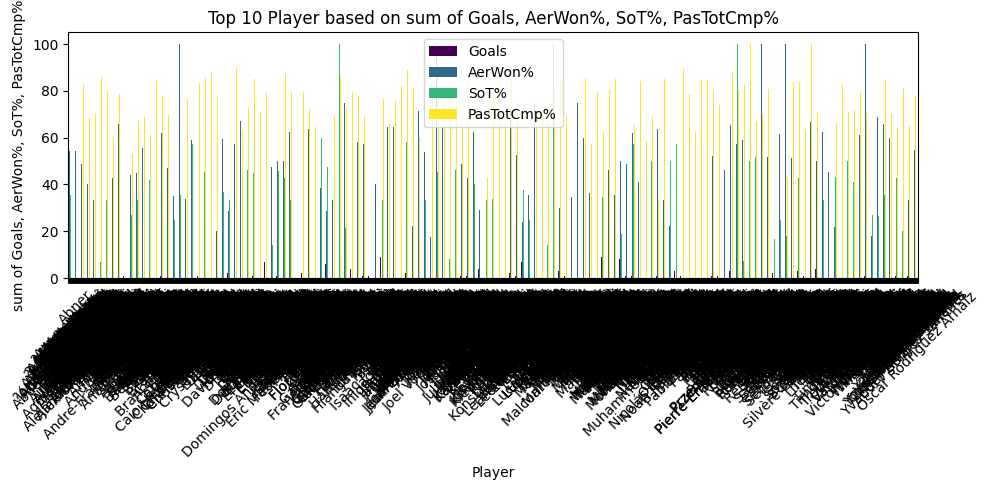

In [41]:
def sport_viz(df, sel, col, stats, f, addi={'n': 2, 'figsize':[4,4], 'colormap': 'Blues', 'notch': True, 'spe_rows': []}):
    if sel == 'bar':
        # Grouping by col and taking the top n rows based on f for each group
        top_n = df.groupby(col).apply(lambda x: x.nlargest(addi['n'], columns=stats, keep='first'))  # Select top n players based on stats
        top_n = top_n.reset_index(drop=True)  # Reset index to remove the extra level
        # Plotting
        fig, ax = plt.subplots(figsize=addi['figsize'])
        top_n.plot(kind='bar', x=col, y=stats, ax=ax, colormap=addi['colormap'])
        ax.set_title(f'Top {addi["n"]} {col} based on {f} of {", ".join(stats)}')
        ax.set_xlabel(col)
        ax.set_ylabel(f'{f} of {", ".join(stats)}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        return fig

    elif sel == 'box':
        # Plotting
        fig, ax = plt.subplots(figsize=addi['figsize'])
        sns.boxplot(data=df, x=col, y=stats[0], hue=col, palette=addi['colormap'], notch=addi['notch'], ax=ax)
        ax.set_title(f'Boxplot of {stats[0]} by {col}')
        ax.set_xlabel(col)
        ax.set_ylabel(stats[0])
        plt.xticks(rotation=45)
        plt.tight_layout()
        return fig

    elif sel == 'radar':
        # Filtering rows if specified
        if addi['spe_rows']:
            df = df[df[col].isin(addi['spe_rows'])]

        # Normalizing the data for radar chart
        df_norm = df[stats].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
        
        # Plotting
        fig = go.Figure()
        for index, row in df_norm.iterrows():
            fig.add_trace(go.Scatterpolar(
                r=row.tolist(),
                theta=stats,
                fill='toself',
                name=row[col]
            ))
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, 1]
                )
            ),
            showlegend=True
        )
        return fig

# Test case
df = pd.read_csv('STAT.csv')
col = 'Player'
stats = ['Goals', 'AerWon%', 'SoT%', 'PasTotCmp%']
f = 'sum'
additional = {'n': 10, 'figsize': [10, 5], 'colormap': 'viridis', 'notch': True, 'spe_rows': []}
fig1 = sport_viz(df, 'bar', col, stats, f, additional)
fig1.show()

# Q3) Web Scraping (8 Marks)


Create a function `grammy_scraper(url, start, end, PerfQuery)` that takes a wikipedia page URL (`url`) as input and performs web scraping. The page stores information about The Grammy Award for Best Rock Song category winners and nominees between 1992 and 2023.

Your task is to use `BeautifulSoup` module to scrape the corresponding page, finding the target table, extracting information from HMTL syntax between dates of `start` and `end` and to create a data frame in the end.

The function `grammy_scraper(url, start, end, PerfQuery)` will then perform a pandas query for a fiven `'Performer'` of `PerfQuery` finding number of times nominated and won the award. Then, a string should be printed as given in the below example.

An example test case can be given as
```python
start = 2001
end = 2012
PerfQuery = 'U2'
url = 'https://en.wikipedia.org/wiki/Grammy_Award_for_Best_Rock_Song'
df = grammy_scraper(url, start, end, PerfQuery)
```
with `df` is returned (first 5 lines as an example)
```
|    |   Year[I] | Performer             | Work                  | Winner   |
|---:|----------:|:----------------------|:----------------------|:---------|
|  0 |      2001 | Creed                 | "With Arms Wide Open" | True     |
|  1 |      2001 | 3 Doors Down          | Kryptonite            | False    |
|  2 |      2001 | Lenny Kravitz         | Again                 | False    |
|  3 |      2001 | Matchbox Twenty       | Bent                  | False    |
|  4 |      2001 | Red Hot Chili Peppers | Californication       | False    |
```

and the statement below has been printed.

```
Between years 2001 and 2012, U2 has been nominated for the Grammy Awards 5 times. Among those nominations, U2 won the award 2 times.
```

**WARNING: All the information should be scraped from the HTML page. Manual entries will be discarded and cannot be marked!**

In [11]:
def grammy_scraper(url, start, end, PerfQuery):
    # Step 1: Get HTML content of the Wikipedia page
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Step 2: Find the target table
    table = soup.find('table', class_='wikitable')

    # Step 3: Extract information from HTML syntax between start and end years
    data = []
    for row in table.find_all('tr')[1:]:  # Skipping the header row
        year = row.find('th').text.strip()  # Extract year from th tag
        try:
            year = int(year)
            if start <= year <= end:
                cols = row.find_all('td')
                performer = cols[0].text.strip()
                work = cols[1].text.strip('"')
                winner = True if 'Won' in cols[2].text.strip() else False
                data.append([year, performer, work, winner])
        except ValueError:
            continue
    
    # Step 4: Create a DataFrame
    df = pd.DataFrame(data, columns=['Year', 'Performer', 'Work', 'Winner'])
    
    # Step 5: Perform pandas query to find number of nominations and wins
    total_nominations = df[df['Performer'] == PerfQuery].shape[0]
    total_wins = df[(df['Performer'] == PerfQuery) & (df['Winner'] == True)].shape[0]
    
    # Step 6: Print the required statement
    print(f"Between years {start} and {end}, {PerfQuery} has been nominated for the Grammy Awards {total_nominations} times. Among those nominations, {PerfQuery} won the award {total_wins} times.")
    
    return df

# Test case
start = 2001
end = 2012
PerfQuery = 'U2'
url = 'https://en.wikipedia.org/wiki/Grammy_Award_for_Best_Rock_Song'
df = grammy_scraper(url, start, end, PerfQuery)
print(df.head())  # Print first 5 lines of the DataFrame


Between years 2001 and 2012, U2 has been nominated for the Grammy Awards 0 times. Among those nominations, U2 won the award 0 times.
   Year                                          Performer  \
0  2001                           Scott StappMark Tremonti   
1  2002  Charlie ColinRob HotchkissPat MonahanJimmy Sta...   
2  2003                                  Bruce Springsteen   
3  2004                                         Jack White   
4  2005          BonoAdam ClaytonThe EdgeLarry Mullen, Jr.   

                            Work  Winner  
0         With Arms Wide Open"\n   False  
1  Drops of Jupiter (Tell Me)"\n   False  
2                  The Rising"\n   False  
3           Seven Nation Army"\n   False  
4                     Vertigo"\n   False  


# Q4) Statistics (20 marks)

You are given a data set (`nba.csv`) which is a record of statistics of several rookie NBA players throughout their first season. Given these sets of features, your task is to (1) select significant features via four different approaches, and (2) perform a prediction comparison of feature selection techniques using Logistic regression. The prediction task will be to check whether the player would still be playing in the NBA 5 years later (column `'5yrs'`) (1 -indicating he will play or 0- indicating he won’t play).
```python
|    | name            |   games_played |   minutes_played |   points_scored |   goals_scored |   goals_attempted |   3_point_scored |   3_point_attempted |   free_throws_scored |   free_throws_attempted |   offensive_rebounds |   defensive_rebounds |   assists |   steals |   blocks |   turnover |   5yrs |
|---:|:----------------|---------------:|-----------------:|----------------:|---------------:|------------------:|-----------------:|--------------------:|---------------------:|------------------------:|---------------------:|---------------------:|----------:|---------:|---------:|-----------:|-------:|
|  0 | Brandon Ingram  |             36 |             27.4 |             7.4 |            2.6 |               7.6 |              0.5 |                 2.1 |                  1.6 |                     2.3 |                  0.7 |                  3.4 |       1.9 |      0.4 |      0.4 |        1.3 |      0 |
|  1 | Andrew Harrison |             35 |             26.9 |             7.2 |            2   |               6.7 |              0.7 |                 2.8 |                  2.6 |                     3.4 |                  0.5 |                  2   |       3.7 |      1.1 |      0.5 |        1.6 |      0 |
|  2 | JaKarr Sampson  |             74 |             15.3 |             5.2 |            2   |               4.7 |              0.4 |                 1.7 |                  0.9 |                     1.3 |                  0.5 |                  1.7 |       1   |      0.5 |      0.3 |        1   |      0 |
|  3 | Malik Sealy     |             58 |             11.6 |             5.7 |            2.3 |               5.5 |              0.1 |                 0.5 |                  0.9 |                     1.3 |                  1   |                  0.9 |       0.8 |      0.6 |      0.1 |        1   |      1 |
|  4 | Matt Geiger     |             48 |             11.5 |             4.5 |            1.6 |               3   |              0   |                 0.1 |                  1.3 |                     1.9 |                  1   |                  1.5 |       0.3 |      0.3 |      0.4 |        0.8 |      1 |
```


## Q4.1) Feature Extraction/Selection (12 Marks)
Create a function `Fextractor(*args)` that performs feature selection operations for the given data set using (1) variance thresholding, (2) importance, (3) Pearson-correlation and (4) LASSO regularisation techniues.

Function input `args` is a tuple and consisting of:
 - `df` --> data set.
 - `target` --> a `str` variable of target column to be predicted in `df` (`'5yrs'`).
 - `sel` --> a `str` variable refers to the selection of feature selection technique. Takes a value from `['var', 'imp', 'cor', 'lasso']`.
 - `addi` --> a `dict` variable storing technique specific additional variables.

Function *returns* the selected features in a `list` format.

Lastly, you should perform a feature selection depending on the passed function arguments and each call must run a single technique based on `sel` value.

An example test case is
```python
df = pd.read_csv('nba.csv')
target = '5yrs'
sel = 'imp'
addi = {'threshold':[0.5, 0.01, 0.15, 0], 'imp_func':LinearRegression}
Fextractor(df, target, sel, addi)
```
that returns the variables in a list
```
['games_played', '3_point_scored', '3_point_attempted', 'free_throws_scored', 'free_throws_attempted', 'offensive_rebounds']
```

In [36]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

def Fextractor(df, target, sel, addi={}):
    # Convert non-numeric columns to numeric if necessary
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    for col in df.columns:
        if col not in numeric_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    X = df.drop(columns=[target]).fillna(0)
    y = df[target].fillna(0)

    if sel == 'var':
        threshold = addi.get('threshold', 0.0)
        selector = VarianceThreshold(threshold=threshold)
        selector.fit(X)
        selected_features = X.columns[selector.get_support()].tolist()

    elif sel == 'imp':
        imp_func = addi.get('imp_func', f_regression)
        selector = SelectKBest(score_func=imp_func, k='all')
        selector.fit(X, y)
        selected_features = X.columns[selector.get_support()].tolist()

    elif sel == 'cor':
        corr_matrix = X.corrwith(y)
        selected_features = corr_matrix[abs(corr_matrix) >= addi.get('threshold', 0.0)].index.tolist()

    elif sel == 'lasso':
        alpha = addi.get('alpha', 1.0)
        lasso = Lasso(alpha=alpha)
        lasso.fit(X, y)
        selected_features = X.columns[lasso.coef_ != 0].tolist()

    else:
        raise ValueError("Invalid value for 'sel'. Choose from 'var', 'imp', 'cor', or 'lasso'.")

    return selected_features

# Test case
df = pd.read_csv('nba.csv')
target = '5yrs'
sel = 'imp'
addi = {'threshold': 0.01, 'imp_func': f_regression}
selected_features = Fextractor(df, target, sel, addi)
print(selected_features)


['name', 'games_played', 'minutes_played', 'points_scored', 'goals_scored', 'goals_attempted', '3_point_scored', '3_point_attempted', 'free_throws_scored', 'free_throws_attempted', 'offensive_rebounds', 'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnover']


## Q4.2) Prediction and Performance Analysis (8 Marks)

Here, you are asked to perform Logistic regression perdictions for target variable `'5yrs'` by using each of the four feature selection outputs in Q4.1. Then, you need to visualise the prediction performance, and evaluate them in terms of prediction accuracy (Acc%), mean square error (MSE) and area under curve (AUC) metrics.

For this purpose,
 - create a function `prediction_perf(*args)` which evaluates the prediction performance of the Logistic regression model with different features.
 - Function input `args` is a tuple and consisting of:
 - `df` --> data set.
 - `target` --> a `str` variable of target column to be predicted in `df`.
 - `addi` --> a `dict` variable storing technique specific additional variables.
 ```python
 addi = {'threshold':[0, 0, 0, 0], 'imp_func':LinearRegression}
 ```
 - Up to this point, you should have obtained the selected features from (1) variance thresholding, (2) importance, (3) Pearson-correlation and (4) LASSO regularisation techniues.
 - Also, in `prediction_perf(*args)`, you should also prepare the data for training and testing (E.g. use `sklearn` library's `train_test_split` function!)
 - Assume predicted values for a given model are stored in a variable $P$. The first performance measure will be the MSE, and will be calculated from the expression below (Do not use `sklearn` function for MSE!):

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - Winner_i)^2$$

 - In order to obtain the prediction accuracy for each model, you need to use `sklearn` module and its `accuracy_score()` function. Similarly, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model.

 - You then need to create a `pandas` dataframe `df_results` and the `prediction_perf()` function should `print` and `return` this.

 - Consequently, by using `matplotlib` library, plot ROC curve for all four prediction results.

An example test case is
```python
target = '5yrs'
addi = {'threshold':[0.5, 0.01, 0.15, 0], 'imp_func':LinearRegression}
df_results = prediction_perf(df, target, addi)
```
prints `df_results` (*Please note these values are jut representatives. Your results might be different!*)
```
|    | Model                 |   ACC% |    MSE |   AUC |
|---:|:----------------------|-------:|-------:|------:|
|  0 | Variance Thresholding |  71.07 | 0.1926 | 0.753 |
|  1 | Importance            |  70.56 | 0.1885 | 0.764 |
|  2 | Correlation           |  68.02 | 0.1968 | 0.739 |
|  3 | LASSO Reg.            |  70.05 | 0.1894 | 0.76  |
```
and plot the ROC curve

![Example ROC Curve for Q4.2 test case.](https://drive.google.com/uc?id=1bm7IAfsgCsll6b3fyB2M_rMblQVNUkK1)

c:\Users\never\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\never\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

   Model       ACC%       MSE       AUC
0    var  67.476636  0.325234  0.734940
1    imp  67.289720  0.327103  0.735522
2    cor  67.476636  0.325234  0.734940
3  lasso  65.046729  0.349533  0.681545


c:\Users\never\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\never\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\never\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\never\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_log

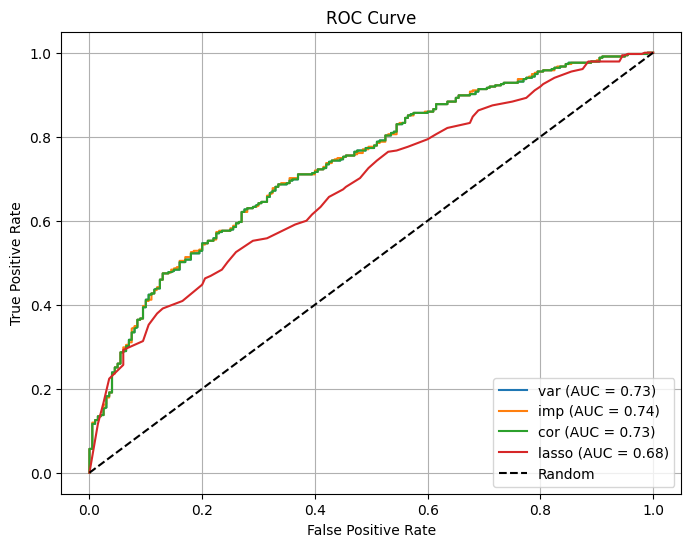

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def prediction_perf(df, target, addi={}):
    try:
        # Check if target column is present in the DataFrame
        if target not in df.columns:
            raise KeyError(f"Target column '{target}' not found in DataFrame.")
        
        X = df.drop(columns=[target]).fillna(0)
        y = df[target].fillna(0)
        
        # Prepare data for training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Initialize variables to store results
        models = []
        accuracies = []
        mses = []
        aucs = []
        
        # Perform logistic regression prediction for each set of selected features
        for i, sel in enumerate(['var', 'imp', 'cor', 'lasso']):
            selected_features = Fextractor(df, target, sel, addi)
            
            # Train logistic regression model
            model = LogisticRegression()
            model.fit(X_train[selected_features], y_train)
            
            # Predict on test set
            y_pred = model.predict(X_test[selected_features])
            
            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred) * 100
            accuracies.append(accuracy)
            
            # Calculate MSE
            mse = ((y_pred - y_test) ** 2).mean()
            mses.append(mse)
            
            # Calculate AUC
            y_prob = model.predict_proba(X_test[selected_features])[:,1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            
            # Store model results
            models.append(sel)
        
        # Create dataframe to store results
        df_results = pd.DataFrame({'Model': models, 'ACC%': accuracies, 'MSE': mses, 'AUC': aucs})
        
        # Print and return results
        print(df_results)
        
        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        for i, sel in enumerate(['var', 'imp', 'cor', 'lasso']):
            selected_features = Fextractor(df, target, sel, addi)
            model = LogisticRegression()
            model.fit(X_train[selected_features], y_train)
            y_prob = model.predict_proba(X_test[selected_features])[:,1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{sel} (AUC = {aucs[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
        
        return df_results
    
    except KeyError as e:
        print(f"Error: {e}")
        return None
    
target = '5yrs'
addi = {'threshold': 0.01, 'imp_func': f_regression}
df_results = prediction_perf(df, target, addi)

